# COGS 118A - Project Checkpoint

# Names
- Dhathry Doppalapudi | A16298078
- Serina Khanna | A15851279
- Niko Calsada | A15352545

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


In [3]:
# import packages and get data
import numpy as np
import pandas as pd
import sklearn #if this doesn't work, run in terminal: $pip3 install -U scikit-learn scipy matplotlib 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

product_range = pd.read_csv('data/Product_range.csv')
transactions = pd.read_csv('data/Transactions.csv')
product_range.head()

,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
1,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
2,1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6
3,4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4,4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5


### Data Filtering

In [8]:
# Data Filtering - Product_Range
# what columns should we remove? maybe base_unit or country of origin?
# we should strip the size from the name (i.e. 1 Symbiotica Apple 0.375 -> 1 Symbiotica Apple) and make sure size is in Size column
# remove rows with NaN/"??" values in ALL categories, or we can attempt to fill in some by hand (but that would be hard, there's 1000+ drinks with no vendor_code)
# we should also standardize the variables, like some categories will only have numbers and some will be strings
# Rename column names
# Reset index

product_range.head()

,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
1,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
2,1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6
3,4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4,4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5


In [7]:
# Data Filtering - Transactions
# Can remove columns like discount_amount, profit, percentage_markup, discount_percetange to only focus on the sale_amount and keep it simple
# We can filter date_and_time_of_unloading to only be year-month-day (no time)
# Remove NaN/missing values
# Change certain cols to contain strings/numbers
# Rename column names to be easier to call on
# Make sure to reset index
transactions.head()

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02


In [12]:
# Check new shape/total remaining data of both
print("Product range shape:" + str(product_range.shape))
print("Transaction shape: " + str(transactions.shape))

Product range shape:(5314, 8)
Transaction shape: (50084, 8)


### Visualization of Relationships

/var/folders/1h/p0yg3zrn74952165spggmcxr0000gn/T/ipykernel_30610/1864739453.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=0.1, annot=True,cmap='YlGn')


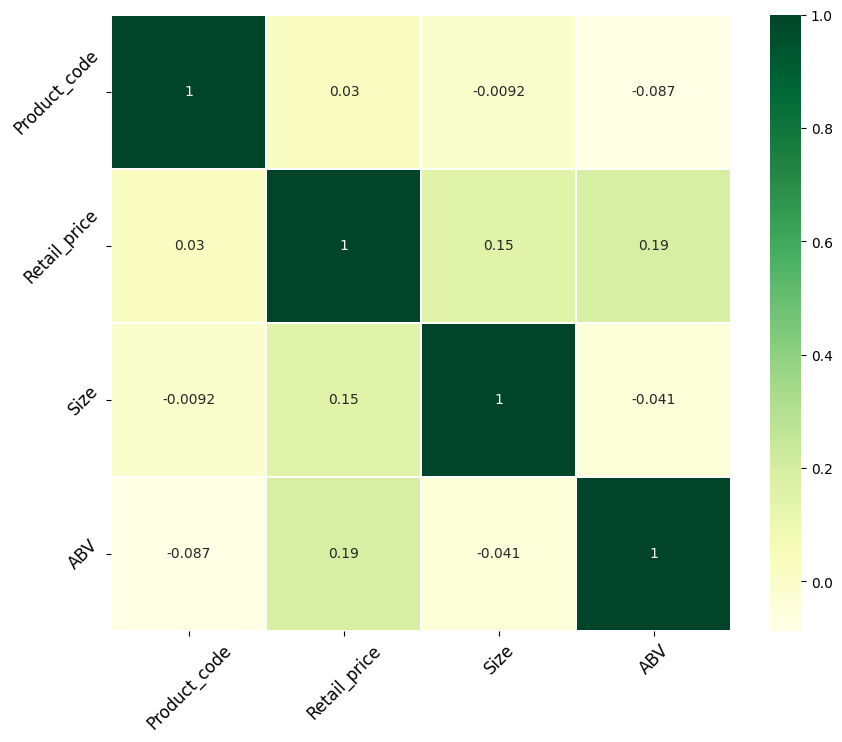

In [13]:
# We can link together the datasets by the product_code in both but that might be messyyyy but we might have to at some point
# Plot relationship between all variables of product_range
plt.figure(figsize=(10, 8))
sns.heatmap(product_range.corr(),linewidths=0.1, annot=True,cmap='YlGn')
plt.xticks(fontsize=12, rotation=45) 
plt.yticks(fontsize=12, rotation=45) 
plt.show()

# Make sure to note any strong correlations

/var/folders/1h/p0yg3zrn74952165spggmcxr0000gn/T/ipykernel_30610/3685113328.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(transactions.corr(),linewidths=0.1, annot=True,cmap='YlGn')


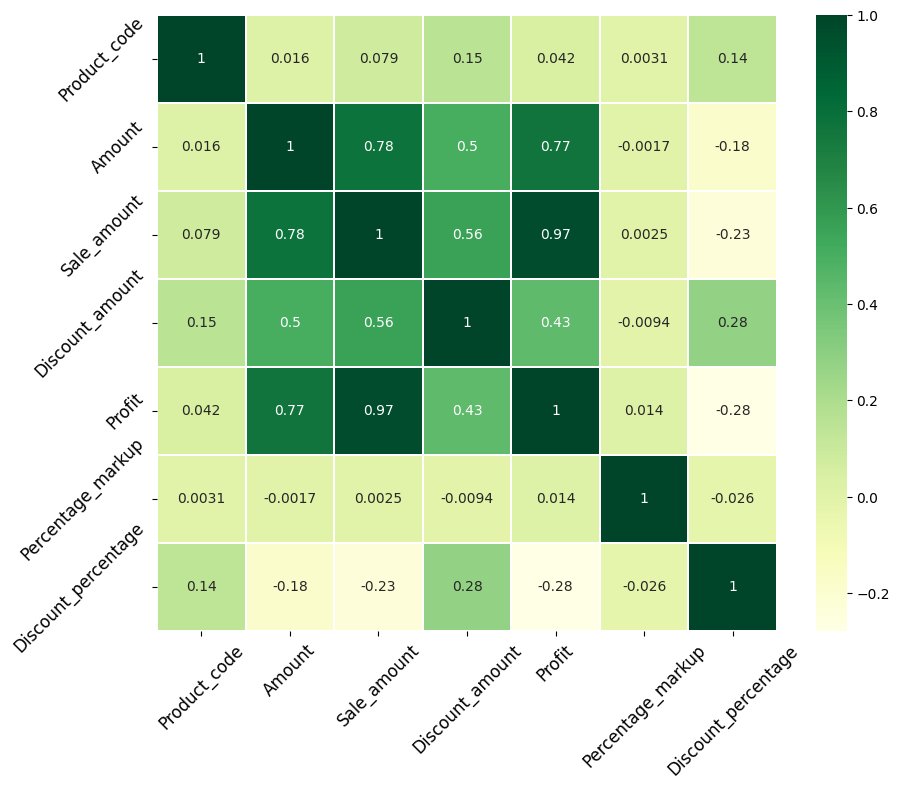

In [16]:
# Plot relationship between all variables of transactions
plt.figure(figsize=(10, 8))
sns.heatmap(transactions.corr(),linewidths=0.1, annot=True,cmap='YlGn')
plt.xticks(fontsize=12, rotation=45) 
plt.yticks(fontsize=12, rotation=45) 
plt.show()

#  Make sure to note any strong correlations

### Logistic Regression

In [ ]:
# train_test_split
# run logistic regression
# evaluate performance
# if accuracy is low, we can try other methods [ or stick to this for now ]

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
